## Decision Tree Classifier

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid") # Plot style
plt.rcParams["figure.figsize"] = (10.0, 8.0)
 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
 
%load_ext autoreload
%autoreload 2

The `DTClassifier` is from `decision_tree.py` script. If you have never used recursive functions in Python before, you may want to read [this](https://realpython.com/python-thinking-recursively/) or any similar tutorial to have more idea about the recursive functions in the code. 

Custom DT algorithm implementation using `Titanic` dataset from [Kaggle](https://www.kaggle.com/c/titanic).

In [2]:
from src.decision_tree import DTClassifier

In [6]:
df = pd.read_csv("data/raw/train.csv")
df.head()
# df.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data = df[["Pclass", "Sex", 'Survived']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="Survived"), data[["Survived"]], random_state=0)

In [9]:
start = time.perf_counter()
model = DTClassifier(impurity="gini")
model.fit(X_train, y_train)
print("Impurity measure: Gini index")
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model.predict(X_train), y_train))
print("Test accuracy: ", accuracy_score(model.predict(X_test), y_test))

Impurity measure: Gini index
Time taken: 0.00948959999999488 sec
Train accuracy:  0.7889221556886228
Test accuracy:  0.7802690582959642


In [10]:
start = time.perf_counter()
model = DTClassifier(impurity="entropy")
model.fit(X_train, y_train)
print("Impurity measure: Entropy")
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model.predict(X_train), y_train))
print("Test accuracy: ", accuracy_score(model.predict(X_test), y_test))

Impurity measure: Entropy
Time taken: 0.006985899999989442 sec
Train accuracy:  0.7889221556886228
Test accuracy:  0.7802690582959642


The accuracy should be about $78\%$ in both cases.

In [11]:
data_with_age = df[["Pclass", "Sex", "Age", "Survived"]]
data_with_age.isna().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

For simplicity, the rows with missing data can be removed.

In [12]:
data_with_age = data_with_age.dropna()
data_with_age.shape

(714, 4)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_with_age.drop(columns="Survived"), data_with_age[["Survived"]], random_state=0)

In [14]:
start = time.perf_counter()
model = DTClassifier(impurity="gini")
model.fit(X_train, y_train)
print("Impurity measure: Gini index")
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model.predict(X_train), y_train))
print("Test accuracy: ", accuracy_score(model.predict(X_test), y_test))

Impurity measure: Gini index
Time taken: 0.25081639999999084 sec
Train accuracy:  0.902803738317757
Test accuracy:  0.8044692737430168


In [15]:
start = time.perf_counter()
model = DTClassifier(impurity="entropy")
model.fit(X_train, y_train)
print("Impurity measure: Entropy")
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model.predict(X_train), y_train))
print("Test accuracy: ", accuracy_score(model.predict(X_test), y_test))

Impurity measure: Entropy
Time taken: 0.29551660000001334 sec
Train accuracy:  0.902803738317757
Test accuracy:  0.8044692737430168


Here, the accuracy should get about $80\%$ in both cases.
Let's compare with Sklearn's implementation as always. The non-numeric features need to be encoded first.

In [16]:
data1 = pd.get_dummies(data, drop_first=True)
data1.head()

,Pclass,Survived,Sex_male
0,3,0,True
1,1,1,False
2,3,1,False
3,1,1,False
4,3,0,True


In [17]:
X = data1.drop(columns="Survived")
y = data1[["Survived"]]

X_train1, X_test1, y_train, y_test = train_test_split(X, y, random_state=0)
X_train1.head()

,Pclass,Sex_male
105,3,True
68,3,False
253,3,True
320,3,True
706,2,False


In [18]:
start = time.perf_counter()
model1 = DecisionTreeClassifier(criterion="gini")
model1.fit(X_train1, y_train)
print("Impurity measure: Gini")
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model1.predict(X_train1), y_train))
print("Test accuracy: ", accuracy_score(model1.predict(X_test1), y_test))

Impurity measure: Gini
Time taken: 0.025246600000002672 sec
Train accuracy:  0.7889221556886228
Test accuracy:  0.7802690582959642


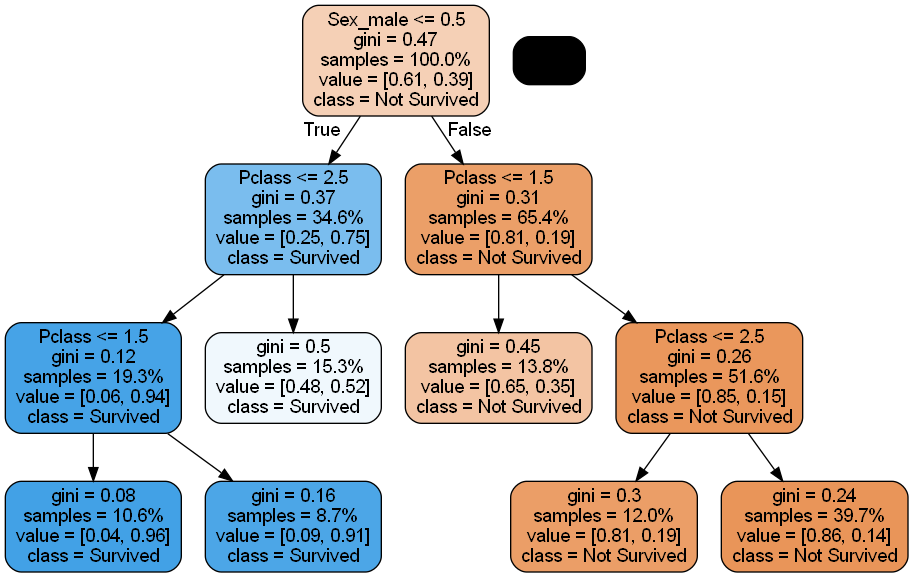

In [20]:
dot_data = export_graphviz(model1, out_file=None, feature_names = X_train1.columns,
                        class_names = ["Not Survived", "Survived"], rounded = True, proportion = True, 
                        precision = 2, filled = True, impurity = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [21]:
start = time.perf_counter()
model1 = DecisionTreeClassifier(criterion="entropy")
model1.fit(X_train1, y_train)
print("Impurity measure: Entropy")
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model1.predict(X_train1), y_train))
print("Test accuracy: ", accuracy_score(model1.predict(X_test1), y_test))

Impurity measure: Entropy
Time taken: 0.007044599999971979 sec
Train accuracy:  0.7889221556886228
Test accuracy:  0.7802690582959642


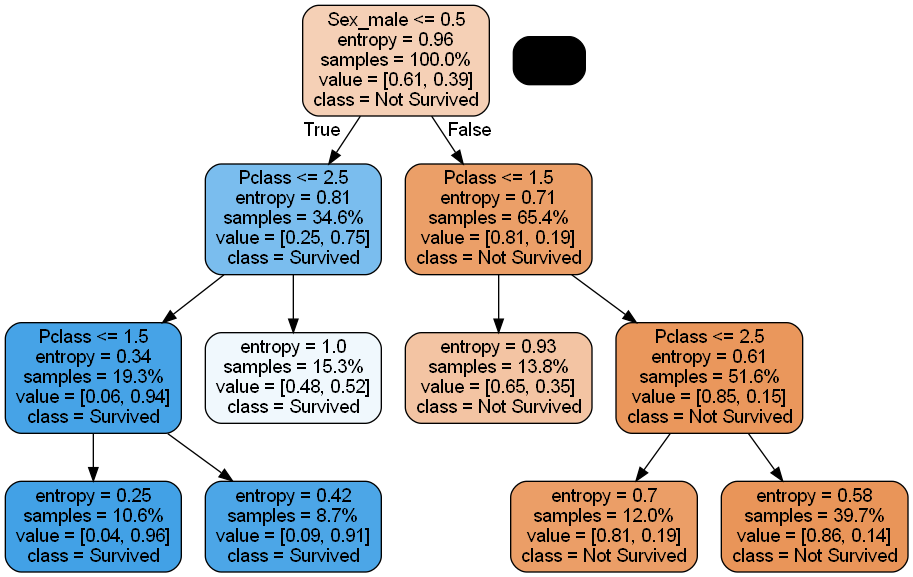

In [22]:
dot_data = export_graphviz(model1, out_file=None, feature_names = X_train1.columns,
                        class_names = ["Not Survived", "Survived"], rounded = True, proportion = True, 
                        precision = 2, filled = True, impurity = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

Now let's see the case with `Age` variable.

In [23]:
data2 = pd.get_dummies(data_with_age, drop_first=True)
X_train2, X_test2, y_train, y_test = train_test_split(data2.drop(columns="Survived"), data2[["Survived"]], random_state=0)

In [24]:
start = time.perf_counter()
model1 = DecisionTreeClassifier(criterion="gini")
model1.fit(X_train2, y_train)
print("Impurity measure: Gini index")
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model1.predict(X_train2), y_train))
print("Test accuracy: ", accuracy_score(model1.predict(X_test2), y_test))

Impurity measure: Gini index
Time taken: 0.01097410000011223 sec
Train accuracy:  0.902803738317757
Test accuracy:  0.7932960893854749


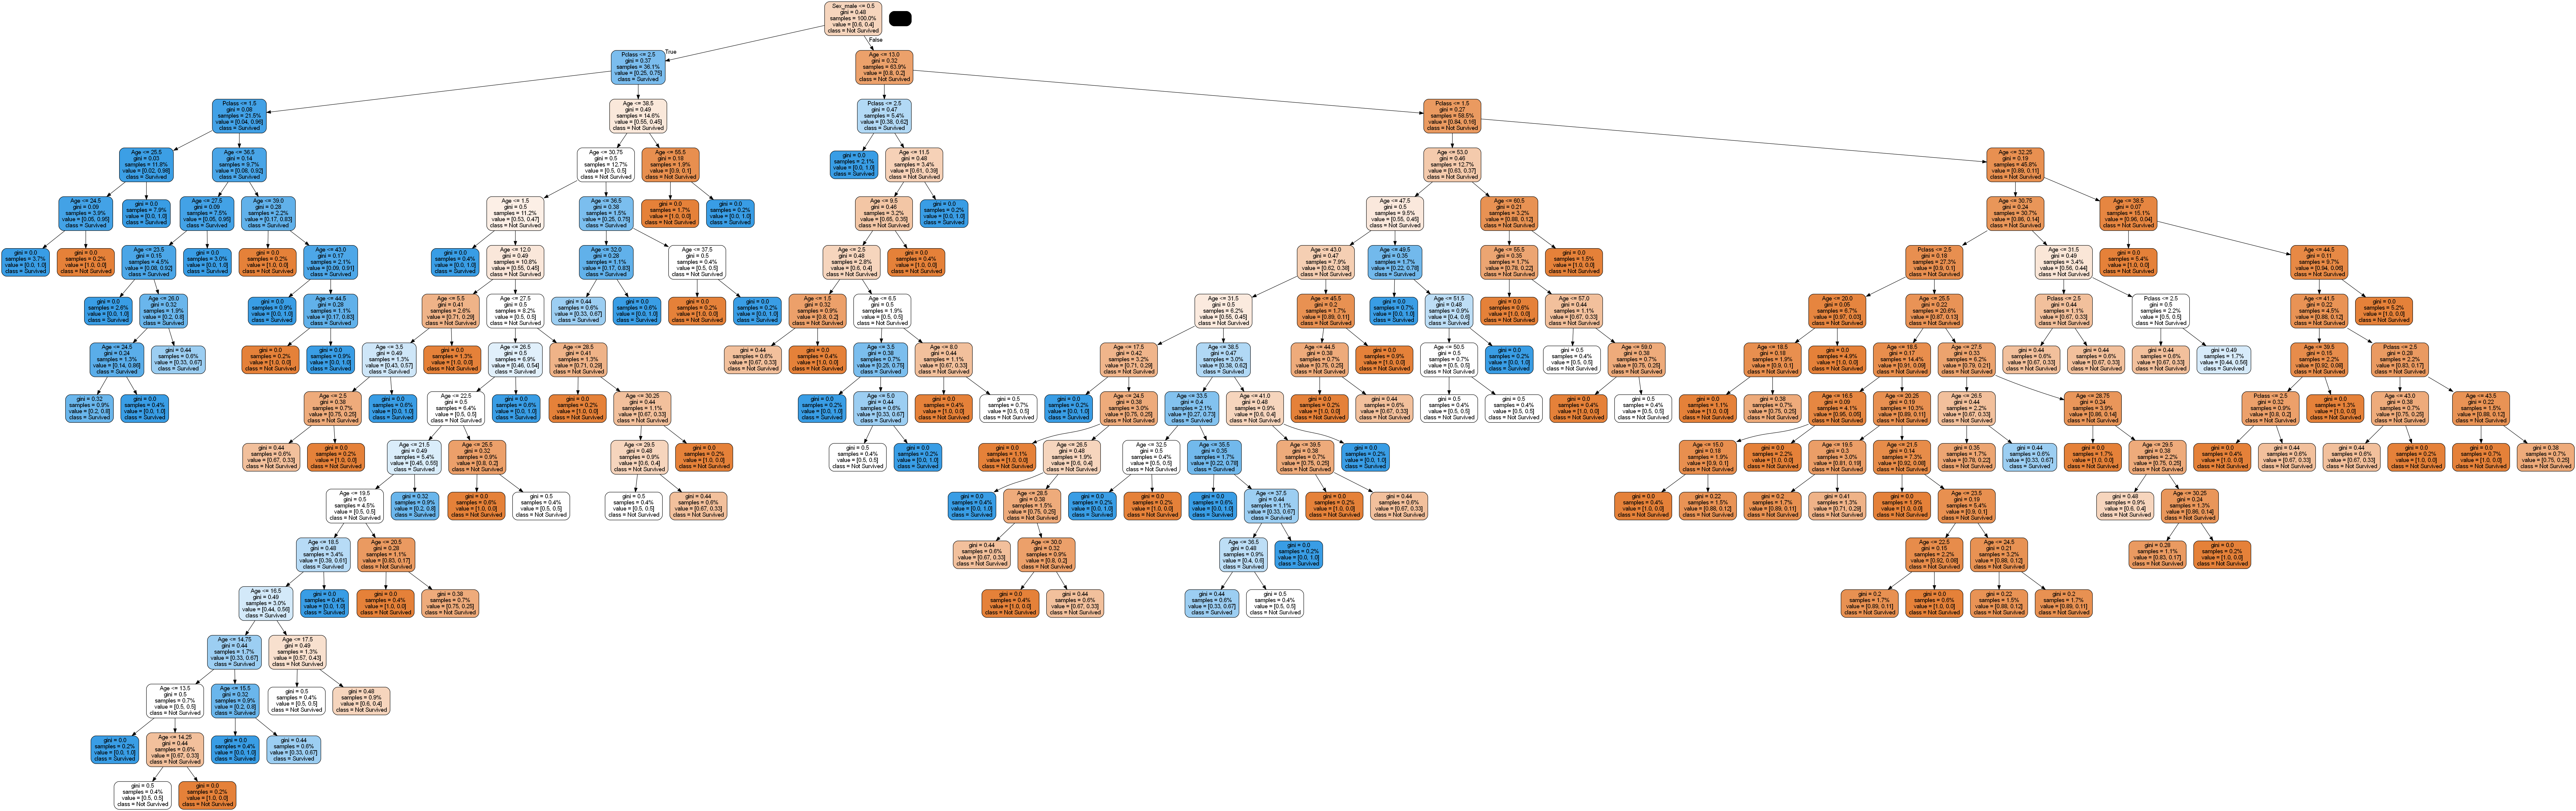

In [25]:
dot_data = export_graphviz(model1, out_file=None, feature_names = X_train2.columns,
                        class_names = ["Not Survived", "Survived"], rounded = True, proportion = True, 
                        precision = 2, filled = True, impurity = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [26]:
# Set a constraint on DT's depth
start = time.perf_counter()
model1 = DecisionTreeClassifier(criterion="gini", max_depth=3)
model1.fit(X_train2, y_train)
print("Impurity measure: Gini index")
print(f"Time taken: {time.perf_counter() - start} sec")
print("Train accuracy: ", accuracy_score(model1.predict(X_train2), y_train))
print("Test accuracy: ", accuracy_score(model1.predict(X_test2), y_test))

Impurity measure: Gini index
Time taken: 0.0061942000002090936 sec
Train accuracy:  0.8168224299065421
Test accuracy:  0.7821229050279329


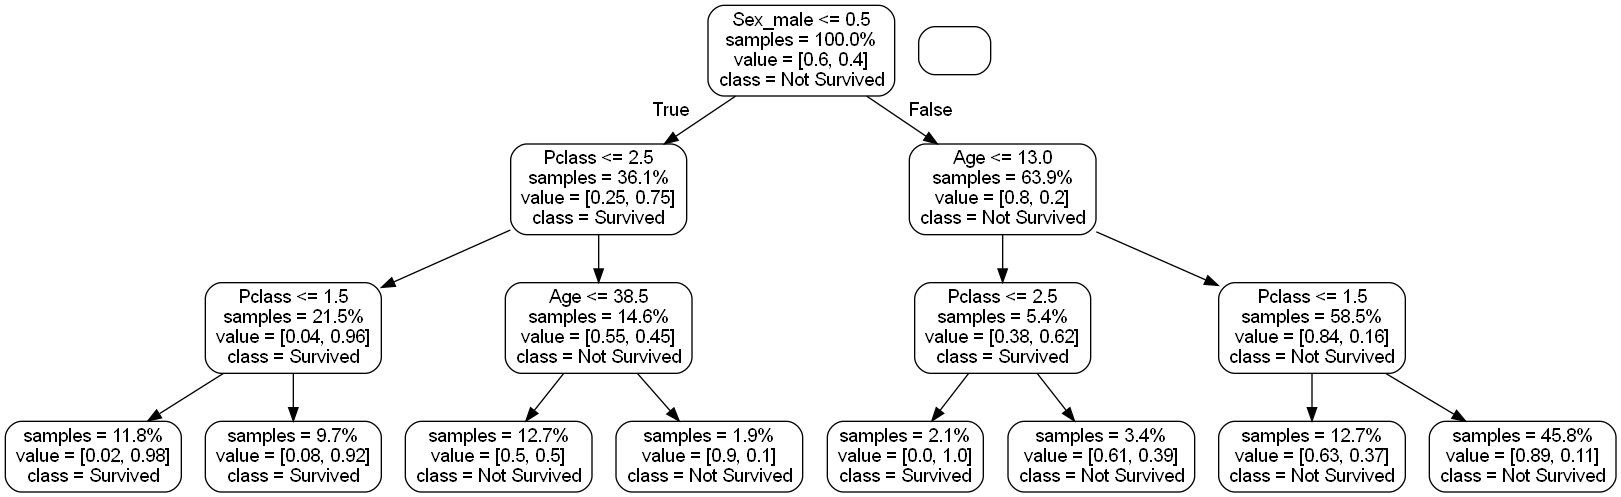

In [27]:
dot_data = export_graphviz(model1, out_file=None, feature_names = X_train2.columns,
                        class_names = ["Not Survived", "Survived"], rounded = True, proportion = True, 
                        precision = 2, filled = False, impurity = False)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())